# Steam Store Exploratory Data Analysis

#### Importing required libraries

In [1]:
import itertools
import re
import numpy as np
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly as pt
import plotly.express as ptt
from scipy import stats
from pandas import DataFrame as DF
from wordcloud import WordCloud

#### Head rows of table.

In [2]:
df1=open(r"H:\AIF\Steam Store Exploratory Data Analysis\archive\steam.csv",encoding='utf8')   #opening or importing file
df1=pd.read_csv(df1)
df1.head()

appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat enabled  Action   
3  Multi-player;Online Multi-Player;Local Multi-P...  Action   
4  Single-player;Multi-player;Valve Anti-Cheat en...  Action   

                  steamspy_tags  achievements  positive_ratings  \
0        Action;FPS;Multiplayer             0            124534   
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   

   price  
0   7.19  
1   3.99  
2   3.99  
3   3.99  
4   3.99

#### Last rows of table.

In [3]:
df1=open(r"H:\AIF\Steam Store Exploratory Data Analysis\archive\steam.csv",encoding='utf8')
df1=pd.read_csv(df1)
df1.tail()

appid                        name release_date  english  \
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher    platforms  required_age  \
27070         SHEN JIAWEI           SHEN JIAWEI      windows             0   
27071      Semyon Maximov      BekkerDev Studio      windows             0   
27072         EntwicklerX           EntwicklerX      windows             0   
27073  Yustas Game Studio  Alawar Entertainment  windows;mac             0   
27074    Adept Studios GD  Alawar Entertainment  windows;mac             0   

                                              categories  \
27070                   Single-player;Steam Achievements   
27071                                      Single-player   
27072  Single-player;Multi-player;Co-op;Shared/Split ...   
27073                          Single-player;Steam Cloud   
27074                          Single-player;Steam Cloud   

                       genres           steamspy_tags  achievements  \
27070  Adventure;Casual;Indie  Adventure;Indie;Casual             7   
27071  Action;Adventure;Indie  Action;Indie;Adventure             0   
27072     Action;Casual;Indie     Action;Indie;Casual            24   
27073  Adventure;Casual;Indie  Indie;Casual;Adventure             0   
27074  Adventure;Casual;Indie  Indie;Casual;Adventure             0   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
27070                 3                 0                 0                0   
27071                 8                 1                 0                0   
27072                 0                 1                 0                0   
27073                 2                 0                 0                0   
27074                 4                 0                 0                0   

        owners  price  
27070  0-20000   2.09  
27071  0-20000   1.69  
27072  0-20000   3.99  
27073  0-20000   5.19  
27074  0-20000   5.19

#### Description of table.

In [4]:
df1.describe()

appid       english  required_age  achievements  \
count  2.707500e+04  27075.000000  27075.000000  27075.000000   
mean   5.962035e+05      0.981127      0.354903     45.248864   
std    2.508942e+05      0.136081      2.406044    352.670281   
min    1.000000e+01      0.000000      0.000000      0.000000   
25%    4.012300e+05      1.000000      0.000000      0.000000   
50%    5.990700e+05      1.000000      0.000000      7.000000   
75%    7.987600e+05      1.000000      0.000000     23.000000   
max    1.069460e+06      1.000000     18.000000   9821.000000   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
count      2.707500e+04      27075.000000      27075.000000      27075.00000   
mean       1.000559e+03        211.027147        149.804949        146.05603   
std        1.898872e+04       4284.938531       1827.038141       2353.88008   
min        0.000000e+00          0.000000          0.000000          0.00000   
25%        6.000000e+00          2.000000          0.000000          0.00000   
50%        2.400000e+01          9.000000          0.000000          0.00000   
75%        1.260000e+02         42.000000          0.000000          0.00000   
max        2.644404e+06     487076.000000     190625.000000     190625.00000   

              price  
count  27075.000000  
mean       6.078193  
std        7.874922  
min        0.000000  
25%        1.690000  
50%        3.990000  
75%        7.190000  
max      421.990000

#### Detecting missing values.

In [5]:
df1.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [6]:
df1.duplicated().sum()

0

#### Column names of table.

In [7]:
df1.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

#### If there is missing value or Nan values  then it returns True.

In [8]:
df1.isnull().head()

appid   name  release_date  english  developer  publisher  platforms  \
0  False  False         False    False      False      False      False   
1  False  False         False    False      False      False      False   
2  False  False         False    False      False      False      False   
3  False  False         False    False      False      False      False   
4  False  False         False    False      False      False      False   

   required_age  categories  genres  steamspy_tags  achievements  \
0         False       False   False          False         False   
1         False       False   False          False         False   
2         False       False   False          False         False   
3         False       False   False          False         False   
4         False       False   False          False         False   

   positive_ratings  negative_ratings  average_playtime  median_playtime  \
0             False             False             False            False   
1             False             False             False            False   
2             False             False             False            False   
3             False             False             False            False   
4             False             False             False            False   

   owners  price  
0   False  False  
1   False  False  
2   False  False  
3   False  False  
4   False  False

#### Returns all information about the table.

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

#### Total price of all games released.

In [10]:
Total_price=df1['price'].sum()
Total_price

164567.08000000002

#### Count of same price.

In [11]:
price=DF(df1['price'].value_counts())
price

price
3.99    3211
0.79    2892
0.00    2560
6.99    2050
7.19    1304
...      ...
20.51      1
11.95      1
3.92       1
6.59       1
6.10       1

[282 rows x 1 columns]

In [12]:
price=df1['price'].max()
price

421.99

In [13]:
price=df1['price'].mean()
price

6.078193167128348

In [14]:
price=df1['price'].median()
price

3.99

In [15]:
high_rate=df1['positive_ratings'].max()
high_rate

2644404

In [16]:
df1.sort_values('positive_ratings',ascending=False,inplace=True)
df1.head(1)

appid                              name release_date  english  \
25    730  Counter-Strike: Global Offensive   2012-08-21        1   

                          developer publisher          platforms  \
25  Valve;Hidden Path Entertainment     Valve  windows;mac;linux   

    required_age                                         categories  \
25             0  Multi-player;Steam Achievements;Full controlle...   

                 genres            steamspy_tags  achievements  \
25  Action;Free to Play  FPS;Multiplayer;Shooter           167   

    positive_ratings  negative_ratings  average_playtime  median_playtime  \
25           2644404            402313             22494             6502   

                owners  price  
25  50000000-100000000    0.0

In [17]:
df1.sort_values('positive_ratings',ascending=False,inplace=True)
df1.tail(1)

appid                 name release_date  english  \
18365  744890  TEEN DATE SIMULATOR   2017-11-14        1   

                        developer                   publisher    platforms  \
18365  Creativ Game Developer LLC  Creativ Game Developer LLC  windows;mac   

       required_age                      categories  \
18365             0  Single-player;In-App Purchases   

                               genres               steamspy_tags  \
18365  Casual;RPG;Simulation;Strategy  Casual;Simulation;Strategy   

       achievements  positive_ratings  negative_ratings  average_playtime  \
18365             0                 0                 1                 0   

       median_playtime   owners  price  
18365                0  0-20000   7.19

In [18]:
df1.sort_values('negative_ratings',ascending=False,inplace=True)
df1.head(1)

appid                           name release_date  english  \
12836  578080  PLAYERUNKNOWN'S BATTLEGROUNDS   2017-12-21        1   

              developer         publisher platforms  required_age  \
12836  PUBG Corporation  PUBG Corporation   windows             0   

                                   categories  \
12836  Multi-player;Online Multi-Player;Stats   

                                       genres                 steamspy_tags  \
12836  Action;Adventure;Massively Multiplayer  Survival;Shooter;Multiplayer   

       achievements  positive_ratings  negative_ratings  average_playtime  \
12836            37            496184            487076             22938   

       median_playtime              owners  price  
12836            12434  50000000-100000000  26.99

In [19]:
df1.sort_values('negative_ratings',ascending=False,inplace=True)
df1.tail(1)

appid                name release_date  english developer publisher  \
6568  395550  Operation Hardcore   2016-12-28        1  Cosmocat  Cosmocat   

        platforms  required_age  \
6568  windows;mac             0   

                                             categories  \
6568  Single-player;Local Co-op;Shared/Split Screen;...   

                      genres           steamspy_tags  achievements  \
6568  Action;Adventure;Indie  Action;Indie;Adventure            23   

      positive_ratings  negative_ratings  average_playtime  median_playtime  \
6568                18                 0                 0                0   

       owners  price  
6568  0-20000   4.79

#### Paid and free games

In [20]:
pp=(df1['price']>0).sum()
pf=(df1['price']==0).sum()
labels = ['Paid', 'Free']

fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=[pp, pf])])

fig.update_traces(textinfo='value', textfont_size=20, 
                  marker=dict(colors=['darkorange', 'lightblue'],line=dict(color='black', width=3)))
fig.update_layout(height=450, width=800)
fig.show()

Conlcusion : Mostly paid games are released.

#### Same platform counts

In [21]:
platform=DF(df1.groupby('platforms').value_counts())
platform=DF(platform.groupby('platforms')[0].sum())
platform.reset_index(inplace=True)
platform.rename(columns={0:'num_of_users'},inplace=True) #platform.columns=['','']
platform
#import warnings
#warnings.filterwarnings("ignore")

platforms  num_of_users
0              linux             1
1                mac             3
2          mac;linux             1
3            windows         18398
4      windows;linux           610
5        windows;mac          3439
6  windows;mac;linux          4623

#### Based on Platforms which are of low users

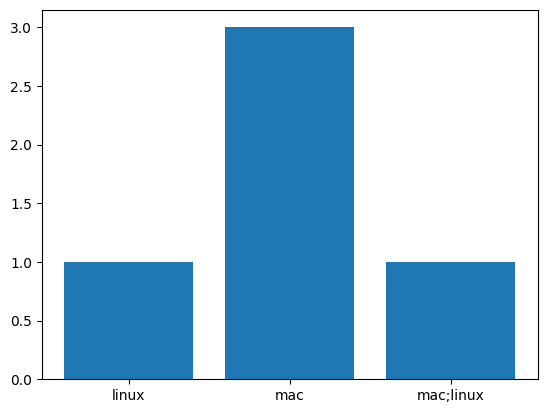

In [22]:
plt.bar('platforms',height='num_of_users',data=platform.loc[:2])
plt.show()

Conclusion : Lowest used platforms are linux and mac.

#### Based on platforms which are of in large users

In [23]:
a=3
label=[]
num=[]
for i in range(3,7):
    if a<=6:
        l,n=platform.loc[a]
        label.append(l)
        num.append(n)
    a+=1
fig = go.Figure(data=[go.Pie(labels=label, 
                             values=num)])

fig.update_traces(textinfo='value', textfont_size=17, 
                  marker=dict(colors=['darkorange', 'lightgreen','salmon','skyblue'],line=dict(color='black', width=2)))
fig.update_layout(height=450, width=800)
fig.show()

Conclusion : Largest used platform is Windows.

#### Most expensive games

In [24]:
df1.sort_values('price',ascending=False,inplace=True)
df=df1.head(5)
fig=ptt.bar(df,x="name",y="price",hover_name="name",title="Top 5 most expensive games")
fig.show()

Conclusion : Most expensive game is "ADR-Labelling Game".

#### Total price based on year wise

In [25]:
df1['release_date'].astype('string')
df1['release_date']=df1['release_date'].str[:4]
#df1['release_date']
dp=DF(df1.groupby('release_date')['price'].sum())
dp.reset_index(inplace=True)
#dp
#fig=ptt.bar(dp,x="release_date",y="price")
#fig.show()
ls=[]
for l in range(1,24):
    ls.append(15)
fig=ptt.scatter(dp,x="release_date",y="price",color="release_date", size=ls)
fig.show()

Conclusion : Highest priced games are released on 2018.

#### Based on developer and publisher

In [26]:
d=len(df1[df1['publisher']==df1['developer']])
d1=len(df1)
re=int(d1)-int(d)
val=[d,re]
#plt.figure(figsize=(6,6))
lab=["Same Dev and Pub","Different Pub and Dev"]
fig = go.Figure(data=[go.Pie(labels=lab, 
                             values=val)])

fig.update_traces(textinfo='value', textfont_size=20, 
                  marker=dict(colors=[ 'lightblue','salmon'],line=dict(color='black', width=2)))
fig.update_layout(height=450, width=800)
fig.show()

Conclusion : Most games are developed and released by same people.

#### Top 20 most liked game based on ratings

In [27]:
df1.sort_values('positive_ratings',ascending=False,inplace=True)
df=df1.head(20)
fig=ptt.scatter(df,x="release_date",y="price",size="positive_ratings",color="name",hover_name="publisher",log_x=True,size_max=70)
fig.show()

#df1.sort_values('negative_ratings',ascending=False,inplace=True)
df=df1.head(20)
#fig=ptt.scatter(df,x="release_date",y="price",size="negative_ratings",color="name",hover_name="publisher",log_x=True,size_max=70)
#fig.show()

Conclusion : Most rated game is Counter-Strike: Global Offensive.

#### Number of games released every year

In [28]:
daa=DF(df1.groupby('release_date').value_counts())
daa.reset_index(inplace=True)
daa=DF(daa.groupby('release_date')[0].sum())
daa.rename(columns={0:'Count'},inplace=True)
daa.reset_index(inplace=True)
df1['release_date']=pd.to_datetime(df1['release_date'],format='%Y-%m-%d')
daa['release_date']=pd.DatetimeIndex(daa['release_date']).year
fig=ptt.bar(daa,x="release_date",y="Count")
fig.show()

Conclusion : Highest number of games released on 2018.

#### Number of games released every month

In [29]:
df1=open(r"H:\AIF\Steam Store Exploratory Data Analysis\archive\steam.csv",encoding='utf8')   #opening or importing file
df1=pd.read_csv(df1)
df1['release_date']=pd.to_datetime(df1['release_date'],format='%Y-%m-%d')
df1['month'] = df1['release_date'].dt.month
Months = df1.groupby("month").agg({
    "name":"count"
}).reset_index()
Months.rename(columns={'month':'Months','name':'Count'},inplace=True)
Months.sort_values("Count",ascending = False)
fig=ptt.bar(Months,x="Months",y="Count")
fig.show()

Conclusion : Highest number of games released on March and October.

#### Pie chart based on age restrictions

In [30]:
ppp=(df1['required_age']==12).sum()
ppa=(df1['required_age']<12).sum()
pff=(df1['required_age']==18).sum()

labels=['Required age is 12','No age restrictions','Required age is 18']
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=[ppp,ppa,pff])])

fig.update_traces(textinfo='value', textfont_size=20, 
                  marker=dict(colors=['red', 'lightblue','salmon'],line=dict(color='black', width=2)))
fig.update_layout(height=450, width=800)
fig.show()

Conclusion : Most games are not restricted based on age.

#### Based on steamspy_tags count

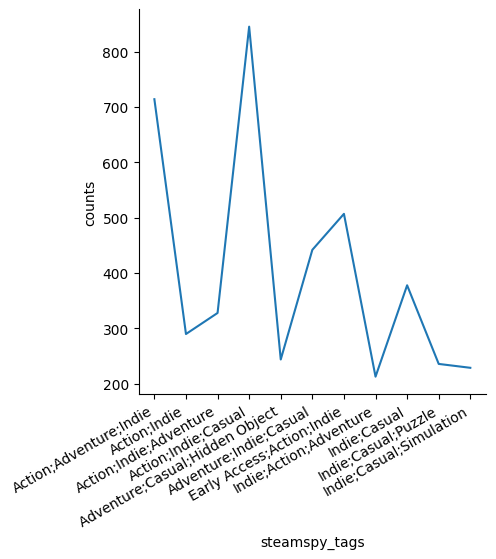

In [31]:
d=DF(df1.groupby('steamspy_tags').value_counts())
d.reset_index(inplace=True)
d=DF(d.groupby('steamspy_tags')[0].sum())
d.reset_index(inplace=True)
d=d[d[0]>=200]
d.columns=['steamspy_tags','counts']
g=sns.relplot(x='steamspy_tags',y='counts',kind='line',data=d)
g.fig.autofmt_xdate()

Conclusion : The most used steamspy_tag is "Action;Indie;Casual" and least used is "Indie;Casual;Simulation"

#### Games based on categories

In [32]:
c=DF(df1.groupby('categories').value_counts())
c.reset_index(inplace=True)
c=DF(c.groupby('categories')[0].sum())
c.reset_index(inplace=True)
c.columns=['categories','Counts']
c=c.sort_values('Counts',ascending=False)
c=c[c['Counts']>=300]

fig=ptt.bar(c,x="categories",y="Counts",color="Counts")
fig.show()

Conclusion : Most games are single player games.

#### Based on genres

In [33]:
ddd=DF(df1.groupby('genres').value_counts())
ddd.reset_index(inplace=True)
ddd=DF(ddd.groupby('genres')[0].sum())
ddd.reset_index(inplace=True)
ddd.rename(columns={0:'Count'},inplace=True)
ddd.sort_values('Count',ascending=False,inplace=True)
ddd=ddd.head(15)
fig=ptt.scatter(ddd,x="genres",y="Count",size="Count",color="genres")
fig.show()

Conclusion : Most games are of "Action;Indie" genres.

# According to PRICE
With combination of play time and price  we are going to understand which are most played by the people with is indirectly says  most downloaded and playing games. This helps to buil games with free download, becs most players plays unpaid game.

#### Based on average time and price

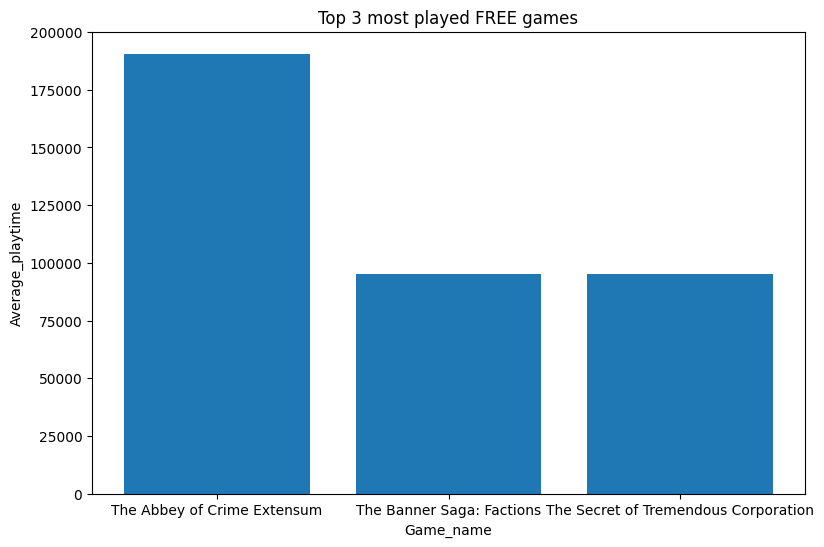

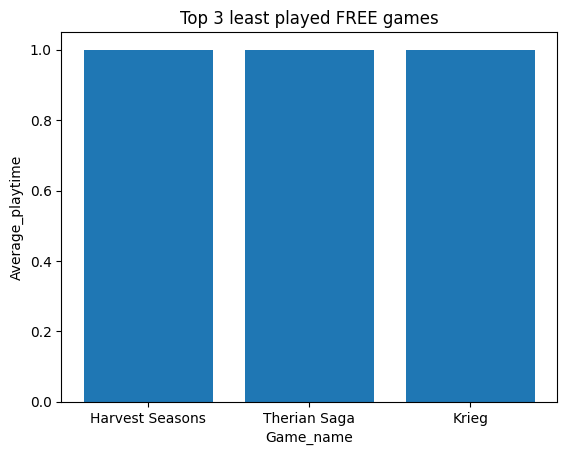

In [34]:
tt=df1[df1["price"]==0]
tt=tt.sort_values("average_playtime",ascending=False)
tt=tt.head(3)
tt
plt.figure(figsize=(9.2,6))
plt.title("Top 3 most played FREE games")
plt.bar("name",height="average_playtime",data=tt)
plt.xlabel("Game_name")
plt.ylabel("Average_playtime")
plt.show()

tl=df1[df1["price"]==0]
tl=tl.sort_values("average_playtime",ascending=True)
tl=tl[tl["average_playtime"]!=0]
tl=tl.head(3)
tl
#plt.figure(figsize=(10,6))
plt.title("Top 3 least played FREE games")
plt.bar("name",height="average_playtime",data=tl)
plt.xlabel("Game_name")
plt.ylabel("Average_playtime")
plt.show()

Conclusion : Most played game is "The abbey of crime extensum" and least played game is "welcome to heaven".

People playing free games for most of time.

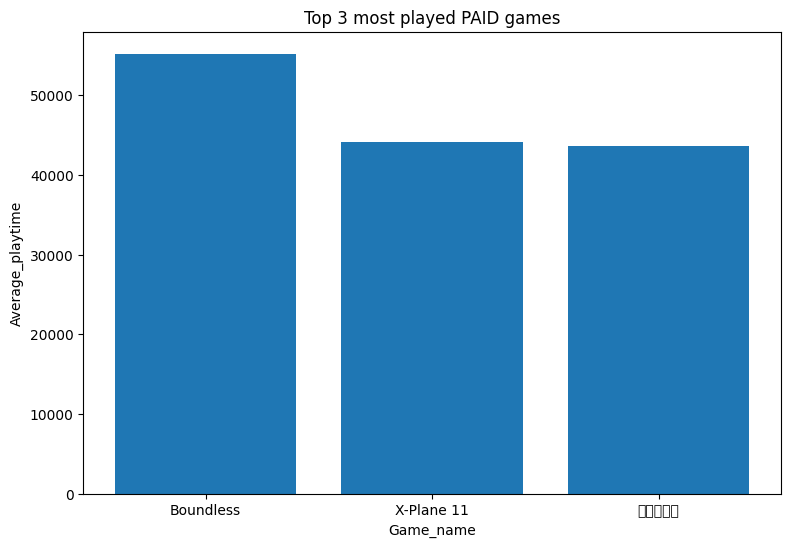

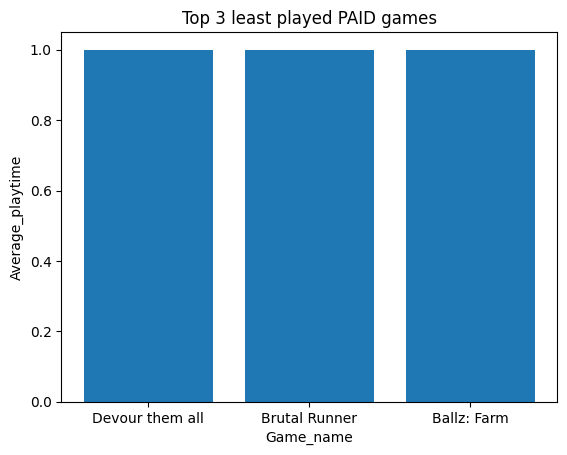

In [35]:
import warnings
warnings.simplefilter('ignore')
tt1=df1[df1["price"]!=0]
tt1=tt1.sort_values("average_playtime",ascending=False)
tt1=tt1.head(3)
plt.figure(figsize=(9,6))
plt.title("Top 3 most played PAID games")
plt.bar("name",height="average_playtime",data=tt1)
plt.xlabel("Game_name")
plt.ylabel("Average_playtime")
plt.show()

tl1=df1[df1["price"]!=0]
tl1=tl1.sort_values("average_playtime",ascending=True)
tl1=tl1[tl1["average_playtime"]!=0]
tl1=tl1.head(3)
#plt.figure(figsize=(10,6))
plt.title("Top 3 least played PAID games")
plt.bar("name",height="average_playtime",data=tl1)
plt.xlabel("Game_name")
plt.ylabel("Average_playtime")
plt.show()

Conclusion : Most played game is "Boundless" and least played game is "Fox tail".

As compare to free game play time, paid games have very less play time.

#### Based on price - ratings.

In [36]:
figure = ptt.scatter(data_frame = df1.head(10), x="price",
                    y="positive_ratings", size="average_playtime",color="positive_ratings",hover_name="name",
                    trendline="ols", 
                    title="Price - Possitive ratings")
figure.show()

Conclusion : Counter-Strike: Global Offensive got most positive ratings.

#### Number of games  based on price

In [37]:
price=DF(df1.groupby("price").value_counts())
price.reset_index(inplace=True)
price=DF(price.groupby("price")[0].sum())
price.reset_index(inplace=True)
price.columns=['price',"counts"]
price.sort_values('counts',ascending=False,inplace=True)
figure = ptt.scatter(data_frame = price.head(15), x="price",
                    y="counts", size="counts",color="price",
                    trendline="ols", 
                    title="Price - Release counts")
figure.show()

# Sentimental Analysis

In [38]:
re=open(r"H:\AIF\Steam Store Exploratory Data Analysis\dataset.csv",encoding='utf8')
re=pd.read_csv(re)
re.head()

app_id        app_name                                        review_text  \
0      10  Counter-Strike                                    Ruined my life.   
1      10  Counter-Strike  This will be more of a ''my experience with th...   
2      10  Counter-Strike                      This game saved my virginity.   
3      10  Counter-Strike  • Do you like original games? • Do you like ga...   
4      10  Counter-Strike           Easy to learn, hard to master.             

   review_score  review_votes  
0             1             0  
1             1             1  
2             1             0  
3             1             0  
4             1             1

#### Review score 

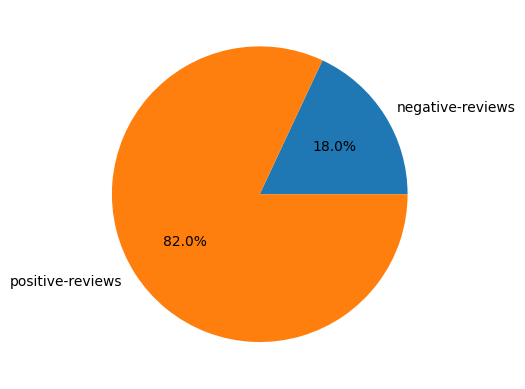

In [39]:
aa2=DF(re.groupby(["review_score"])["review_score"].sum())
aa2.rename(columns={"review_score":'review_score_count'},inplace=True)
aa2.reset_index(inplace=True)
aa2['review_score_count'].loc[0]=abs(aa2['review_score_count'].loc[0])

plt.pie('review_score_count', labels=["negative-reviews","positive-reviews"], data=aa2, radius=1,autopct='%1.1f%%')
plt.show()

Conclusion : Most of the reviews scores are positive.

#### Based on positive review score

In [40]:
aa1=DF(re.groupby(["app_id","app_name","review_score"])["review_score"].sum())
aa1.rename(columns={"review_score":'positive_review_score_count'},inplace=True)
aa1.reset_index(inplace=True)
aa1=aa1[aa1["review_score"]==1]
aa1.sort_values("positive_review_score_count",ascending=False,inplace=True)

fig=ptt.bar(aa1.head(10),x="app_name",y="positive_review_score_count",hover_name="app_name",title="Top 10 most positive review score")
fig.show()

Conclusion : Most liked game by people is "Terraria".

#### Based on negative review score

In [41]:
aa3=DF(re.groupby(["app_id","app_name","review_score"])["review_score"].sum())
aa3.rename(columns={"review_score":'negative_review_score_count'},inplace=True)
aa3.reset_index(inplace=True)
aa3=aa3[aa3["review_score"]==-1]
aa3.sort_values("negative_review_score_count",ascending=True,inplace=True)

fig=ptt.bar(aa3.head(10),x="app_name",y="negative_review_score_count",hover_name="app_name",title="Top 10 most negative review score")
fig.show()

Conclusion : Most disliked game by people is "DayZ".

#### Total review votes count

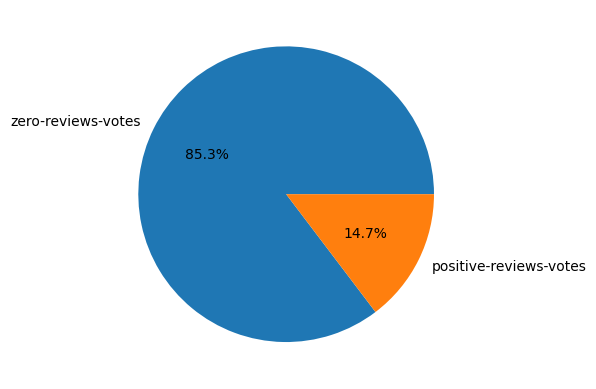

In [42]:
aa6=DF(re.groupby("review_votes").value_counts())
aa6.rename(columns={0:'review_votes_count'},inplace=True)
aa6.reset_index(inplace=True)
aa6=DF(aa6.groupby("review_votes")['review_votes_count'].sum())
aa6.reset_index(inplace=True)

plt.pie('review_votes_count', labels=["zero-reviews-votes","positive-reviews-votes"], data=aa6, radius=1,autopct='%1.1f%%')
plt.show()

Conclusion : Most game's review votes are of zero votes.

#### Based on review votes count

In [43]:
aa4=DF(re.groupby(["app_id","app_name","review_votes"]).value_counts())
aa4.rename(columns={0:'review_votes_count'},inplace=True)
aa4.reset_index(inplace=True)
aa4=DF(aa4.groupby(["app_id","app_name","review_votes"])['review_votes_count'].sum())
aa4.reset_index(inplace=True)
aa4=aa4[aa4["review_votes"]==1]
aa4.sort_values("review_votes_count",ascending=False,inplace=True)

fig=ptt.bar(aa4.head(10),x="app_name",y="review_votes_count",hover_name="app_name",title="Top 10 most positive review votes")
fig.show()

Conclusion : "PAYDAY 2" game has most review votes, but "DayZ" is the 1st and "PAYDAY 2" is the top 2nd negative review scored game.

In [44]:
aa4=DF(re.groupby(["app_id","app_name","review_votes"]).value_counts())
aa4.rename(columns={0:'review_votes_count'},inplace=True)
aa4.reset_index(inplace=True)
aa4=DF(aa4.groupby(["app_id","app_name","review_votes"])['review_votes_count'].sum())
aa4.reset_index(inplace=True)
aa4=aa4[aa4["review_votes"]==0]
aa4.sort_values("review_votes_count",ascending=False,inplace=True)

fig=ptt.bar(aa4.head(10),x="app_name",y="review_votes_count",hover_name="app_name",title="Top 10 most zero review votes")
fig.show()

Conclusion : "Terraria" game has most zero review votes, but "Terraria" is the 1st and "Dota 2" is the top 2nd positive review scored game.

#### Review word cloud

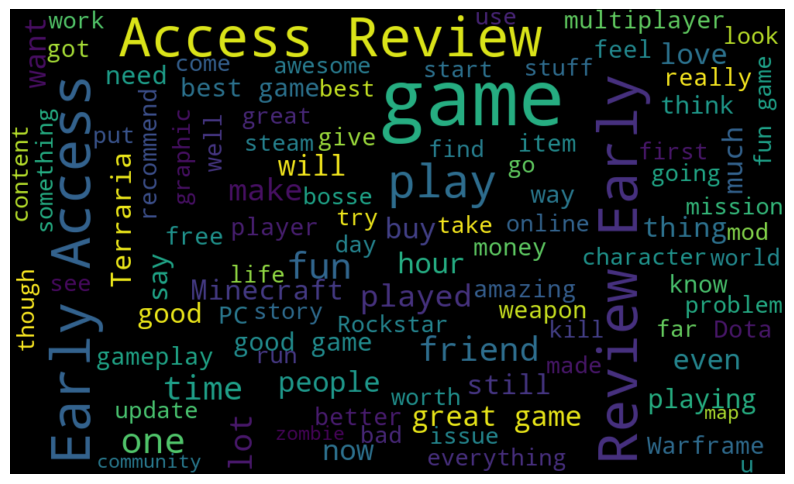

In [45]:
re.review_text=re.review_text.astype('str')
word=re[re.app_name.isin(['Counter-Strike','Terraria','Warframe','War thuder',"Batman™: Arkham Knight",
                          'Call of Duty: Black Ops III','Grand Theft Auto V','Rust','Dota 2'])]
text=' '.join(w for w in word.review_text)

plt.figure(figsize=(10,8))
wc = WordCloud(width = 1000, height = 600,
                background_color ='black',max_words=100,max_font_size = 100).generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Word cloud for positive reviews

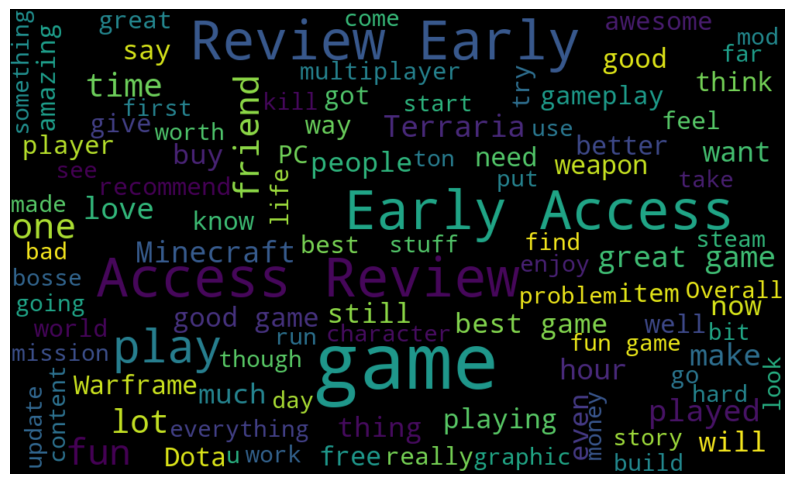

In [46]:
P_R=word[word['review_score']==1]
text=' '.join(w for w in P_R.review_text)
plt.figure(figsize=(10,8))
wc = WordCloud(width = 1000, height = 600,
                background_color ='black',max_words=100,max_font_size = 100).generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Word cloud for negative reviews

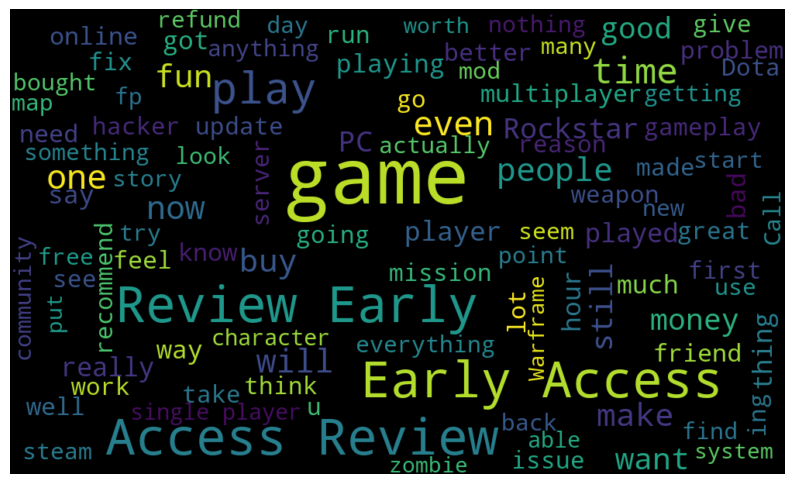

In [47]:
N_R=word[word['review_score']==-1]
text=' '.join(w for w in N_R.review_text)
plt.figure(figsize=(10,8))
wc = WordCloud(width = 1000, height = 600,
                background_color ='black',max_words=100,max_font_size = 100).generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Word cloud for positive votes

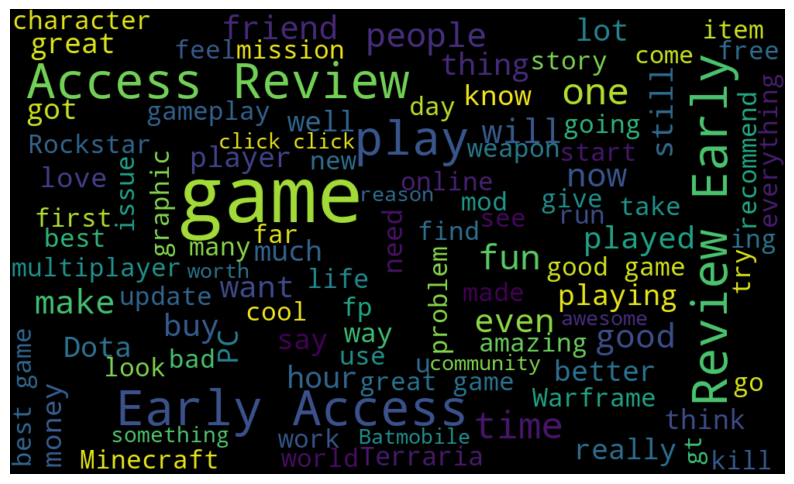

In [48]:
P_V=word[word['review_votes']==1]
text=' '.join(w for w in P_V.review_text)
plt.figure(figsize=(10,8))
wc = WordCloud(width = 1000, height = 600,
                background_color ='black',max_words=100,max_font_size = 100).generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Word cloud for negative votes

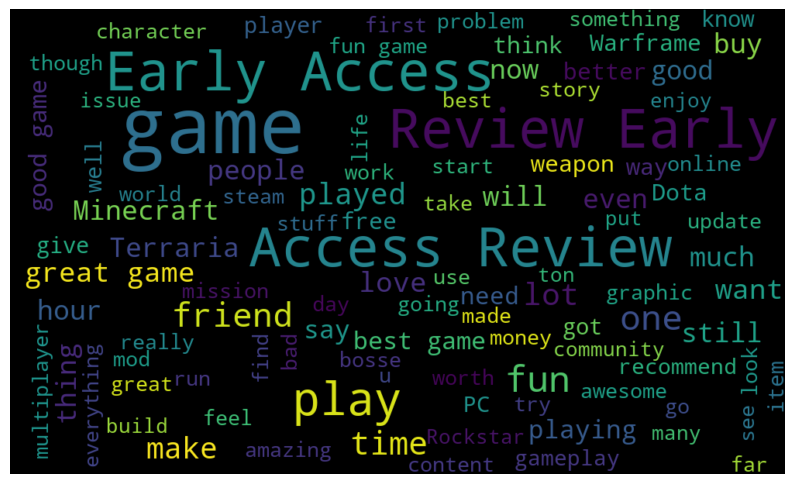

In [50]:
N_V=word[word['review_votes']==0]
text=' '.join(w for w in N_V.review_text)
plt.figure(figsize=(10,8))
wc = WordCloud(width = 1000, height = 600,
                background_color ='black',max_words=100,max_font_size = 100).generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# Conclusion

Table `steam` has the most information valuable for visualization. 

Few main things to take a look at are:
* `categories`: most popular category is "single player".
* `genres`: Most popular genres is "Action;Indie".
* `release_date`: Highest number of games are released on "2018". Highest number of games released in "March" and "October".
* `positive_ratings` : Counter-Strike: Global Offensive got most positive ratings.
* `average_playtime` : Most played game is "The abbey of crime extensum" from free games and "Boundless" from paid games.
* `price` : Most expensive is "ADR-Labelling Game" and most games released are paid games but most downloaded are of free games.